In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import palettable
import pandas as pd

import graphs

In [3]:
import matplotlib.ticker as ticker
mpl.rcParams["axes.prop_cycle"] = mpl.cycler("color", palettable.matplotlib.Inferno_6.mpl_colors)
# mpl.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.sans-serif'] = 'Roboto'

# Ramboll cost data

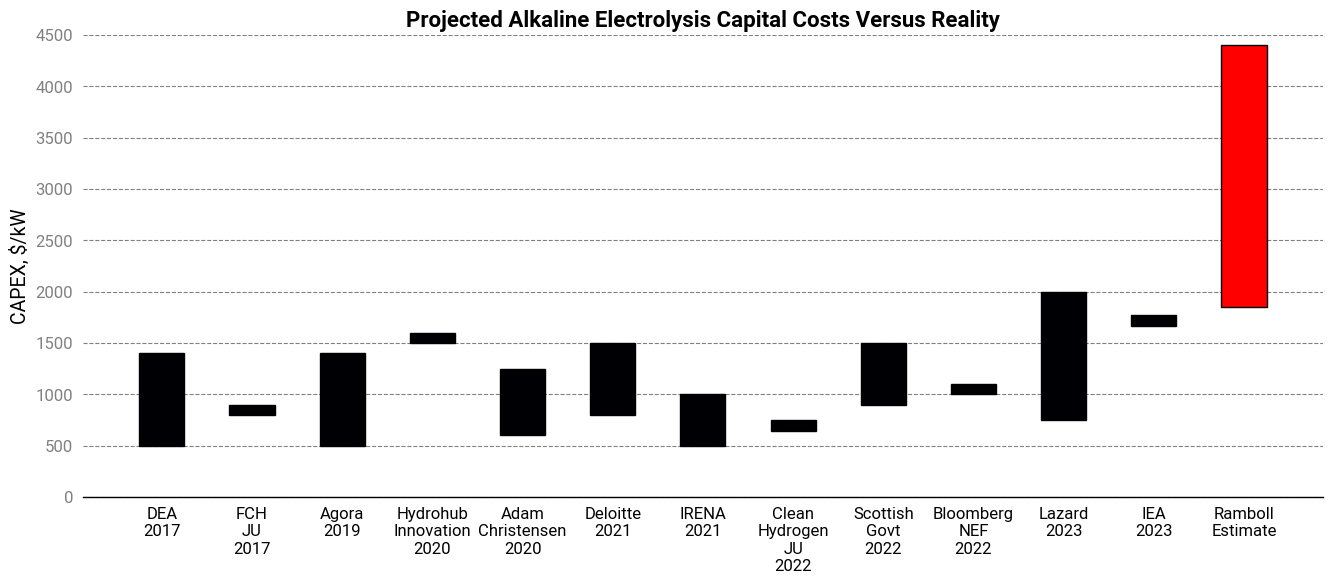

In [ ]:
AE_cost_data = {
    "DEA, 2017": (500, 1400),
    "FCH JU, 2017": (800,900),
    "Agora, 2019": (500, 1400),
    "Hydrohub Innovation, 2020": (1500, 1600),
    "Adam Christensen, 2020": (600, 1250),
    "Deloitte, 2021": (800, 1500),
    "IRENA, 2021": (500, 1000),
    "Clean Hydrogen JU, 2022": (640, 750),
    "Scottish Govt, 2022": (900, 1500),
    "Bloomberg NEF, 2022": (1000, 1100),
    "Lazard, 2023": (750, 2000),
    "IEA, 2023": (1670, 1775),
    "Ramboll Estimate": (1850, 4400)
}

AE_cost_values = AE_cost_data.values()
AE_cost_min = np.array([v[0] for v in AE_cost_values])
AE_cost_max = np.array([v[1] for v in AE_cost_values])

AE_wrapped_labels = [s.replace(" ", "\n").replace(",","") for s in AE_cost_data.keys()]
fig, ax = plt.subplots(1,1)

barlist = ax.bar(
    x = AE_wrapped_labels, 
    height = AE_cost_max-AE_cost_min,
    bottom = AE_cost_min,
    width = 0.5,
    zorder=3,
    edgecolor='k',
)

barlist[-1].set_facecolor("red")
# barlist[-1].set_edgecolor('k')

ax.set_ylim(0, 4500)
ax.set_ylabel("CAPEX, $/kW")

# Add grey y-axis gridlines and change y-tick colors
ax.grid(axis='y', color='grey', linestyle='--', zorder=0)
ax.tick_params(axis='y', colors='grey', left=False)
ax.tick_params(axis='x', labelrotation=0, bottom=False)
# Remove all spines except bottom (x-axis)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_title("Predicted Alkaline Electrolysis capital costs versus reality".title(), fontweight="bold")
fig.set_size_inches(16, 6)


In [5]:
# this is out of curiosity
AE_cost_avgs = (AE_cost_min[:-1] + AE_cost_max[:-1])/2
AE_cost_avgs.mean()

np.float64(1097.2916666666667)

In [6]:
import matplotlib.ticker as ticker

AE_breakdown_data = pd.DataFrame({
    "Construction indirects": [26, 12, 26, 12],
    "Offsites & utilities": [34, 41, 17, 34],
    "Civil": [4,3,14,1],
    "BOP": [21, 15,37, 39],
    "Stack": [15, 29, 6, 14]
}, index=["10 MW PEM", "1 GW PEM", "10 MW Alkaline", "1 GW Alkaline"])

AE_breakdown_data

,Construction indirects,Offsites & utilities,Civil,BOP,Stack
10 MW PEM,26,34,4,21,15
1 GW PEM,12,41,3,15,29
10 MW Alkaline,26,17,14,37,6
1 GW Alkaline,12,34,1,39,14


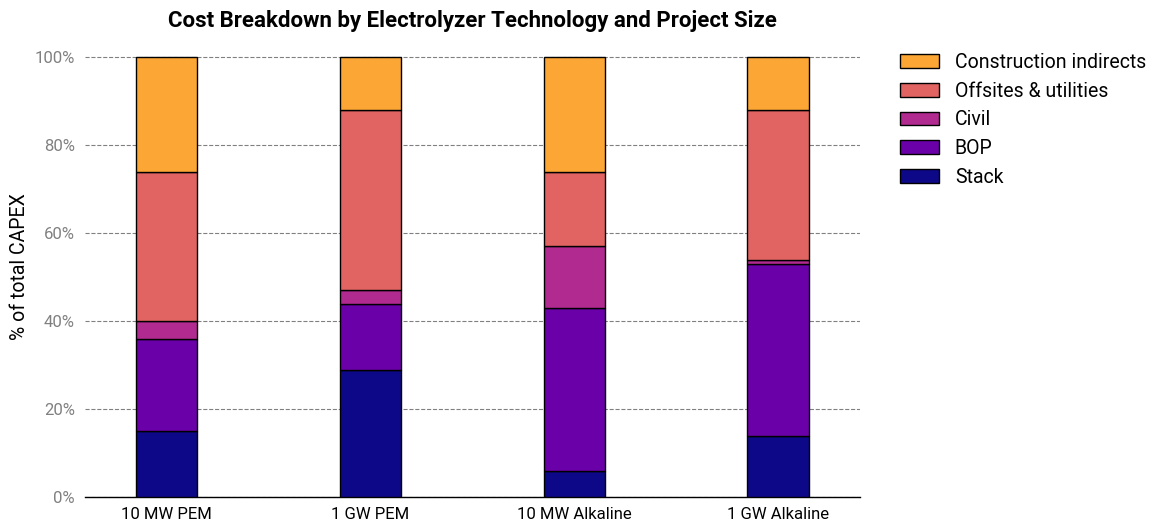

In [7]:
fig, ax = plt.subplots(1,1)
barcolors = palettable.matplotlib.Plasma_6
ax = AE_breakdown_data.iloc[:, ::-1].plot.bar(ax=ax, stacked=True, zorder=3, width=0.3 , color=barcolors.mpl_colors, edgecolor='k', linewidth=1)

# for container in ax.containers:
#     ax.bar_label(container)

# Add grey y-axis gridlines and change y-tick colors
ax.grid(axis='y', color='grey', linestyle='--', zorder=0)
ax.tick_params(axis='y', colors='grey', left=False)
ax.tick_params(axis='x', labelrotation=0, bottom=False)
# Remove all spines except bottom (x-axis)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_ylabel("% of total CAPEX")
ax.yaxis.set_major_formatter(ticker.PercentFormatter())
ax.legend(bbox_to_anchor=(1.03,1), reverse=True)
ax.set_title("Cost Breakdown by Electrolyzer Technology and Project Size", fontweight="bold")
# ax.text()
fig.set_size_inches(10, 6)

In [8]:
projects = pd.read_csv("Hydrogen_production_projects.csv")

In [9]:
electrolyzer_projects = projects[["Technology", "Status", "Capacity_MWel", "Date online"]]
electrolyzer_projects = electrolyzer_projects.loc[(electrolyzer_projects["Technology"] == "ALK") 
                                                  | (electrolyzer_projects["Technology"] == "PEM") 
                                                  | (electrolyzer_projects["Technology"] == "ALK & PEM") ].dropna()
electrolyzer_projects

,Technology,Status,Capacity_MWel,Date online
12,ALK,Operational,4.5,2021.0
13,ALK,FID/Construction,500.0,2025.0
14,PEM,Operational,20.0,2022.0
15,PEM,Operational,2.5,2022.0
17,PEM,DEMO,1.0,2022.0
...,...,...,...,...
2395,PEM,Feasibility study,1400.0,2032.0
2397,PEM,Feasibility study,396.3,2030.0
2407,PEM,FID/Construction,5.0,2025.0
2412,ALK,Feasibility study,6.0,2027.0


In [10]:
projects_by_year = electrolyzer_projects.groupby(["Date online"])
projects_by_year["Capacity_MWel"].sum()

Date online
1965.0       25.0000
1992.0        0.7000
2000.0        8.9846
2001.0        0.0100
2003.0        1.4740
2004.0        0.1939
2005.0        0.0516
2006.0        0.4100
2007.0        0.2000
2008.0       16.2340
2009.0        1.6355
2010.0        0.5060
2011.0        4.5072
2012.0        1.1720
2013.0       13.7895
2014.0       14.5800
2015.0        6.0320
2016.0        3.1850
2017.0       13.4145
2018.0       11.5090
2019.0       27.2220
2020.0       57.2040
2021.0      208.8160
2022.0      117.4900
2023.0      427.2675
2024.0     2139.1000
2025.0     6288.4330
2026.0    12359.8930
2027.0    10156.4000
2028.0     9021.9170
2029.0     1595.0000
2030.0    14767.4000
2032.0     1400.0000
2033.0      500.0000
Name: Capacity_MWel, dtype: float64

In [11]:
completed_projects = electrolyzer_projects.loc[electrolyzer_projects["Status"] == "Operational"]
completed_projects_by_year = completed_projects.groupby(["Date online"])["Capacity_MWel"].sum()

construction_projects = electrolyzer_projects.loc[electrolyzer_projects["Status"] == "FID/Construction"]
construction_by_year = construction_projects.groupby(["Date online"])["Capacity_MWel"].sum()

PEM_projects = electrolyzer_projects.loc[(electrolyzer_projects["Technology"] == "PEM") & (electrolyzer_projects["Status"] == "Operational")]
PEM_by_year = PEM_projects.groupby(["Date online"])["Capacity_MWel"].sum()


ALK_projects = electrolyzer_projects.loc[(electrolyzer_projects["Technology"] == "ALK") & (electrolyzer_projects["Status"] == "Operational")]
ALK_by_year = ALK_projects.groupby(["Date online"])["Capacity_MWel"].sum()

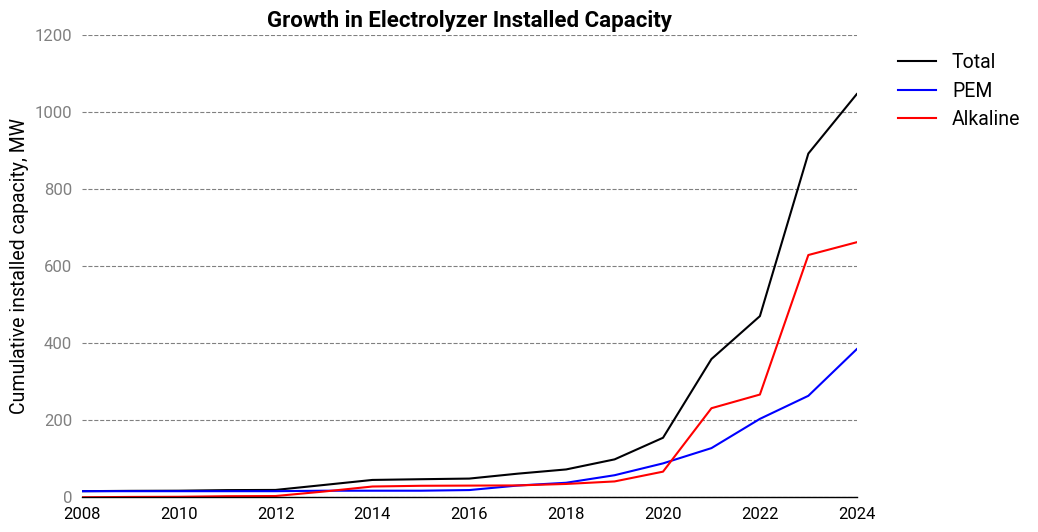

In [12]:
cutoff_year = 2008

fig, ax = plt.subplots(1,1)

completed_projects_by_year.loc[cutoff_year:].cumsum().plot(ax=ax, label="Total")
PEM_by_year.loc[cutoff_year:].cumsum().plot(ax=ax, label="PEM", color="blue")
ALK_by_year.loc[cutoff_year:].cumsum().plot(ax=ax, label="Alkaline", color="red")

ax.set_ylim(0, 1200)
ax.set_ylabel("Cumulative installed capacity, MW")
# Add grey y-axis gridlines and change y-tick colors
ax.grid(axis='y', color='grey', linestyle='--', zorder=0)
ax.tick_params(axis='y', colors='grey', left=False)
ax.tick_params(axis='x', bottom=False)
# Remove all spines except bottom (x-axis)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_title("Growth in Electrolyzer Installed Capacity", fontweight="bold")
ax.legend(bbox_to_anchor=(1.03, 1))
ax.set_xlabel("")
ax.set_xlim(2008, 2024)
fig.set_size_inches(10,6)